In [1]:
# matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# from sklearn import cluster
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler, PowerTransformer, FunctionTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import random
from sklearn.cluster import KMeans
import matplotlib.cm as cm
# from mpl_toolkits.mplot3d import Axes3D
from kneed import KneeLocator

In [2]:
!pip install kneed


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
df = pd.read_csv("cleaned_data.csv", index_col=0)

In [4]:
df.head(5)

,_id,address,tokens,balanceInUSD,borrowInUSD,borrowTokens,dailyNumberOfTransactions,dailyAllTransactions,dailyTransactionAmounts,depositInUSD,type,numberOfLiquidation,totalValueOfLiquidation,_id_contract,address_contract,name_contract,_id_project,name_project,category_project,socialAccounts_project
0,0x8daaa78bf8fc2d19fbb3b88319325607460387a3,0x8daaa78bf8fc2d19fbb3b88319325607460387a3,0.000000,0.000000,0.0,0.0,0,NaN,0.000000,0.000000,multichain_wallet,0.0,0.0,0x38_0x6694340fc020c5e6b96567843da2df01b2ce1eb6,0x6694340fc020c5e6b96567843da2df01b2ce1eb6,Stargate Finance: Bridge,stargate,Stargate,Cross Chain,{'github': 'https://github.com/stargate-protoc...
1,0xdacfe9e62dff6487458f64092aed45a2c9599740,0xdacfe9e62dff6487458f64092aed45a2c9599740,0.000000,0.000000,0.0,0.0,0,NaN,0.000000,0.000000,multichain_wallet,0.0,0.0,0x38_0x6694340fc020c5e6b96567843da2df01b2ce1eb6,0x6694340fc020c5e6b96567843da2df01b2ce1eb6,Stargate Finance: Bridge,stargate,Stargate,Cross Chain,{'github': 'https://github.com/stargate-protoc...
2,0xb7fac33f47af1160ba17eb82e7202584f73a8fad,0xb7fac33f47af1160ba17eb82e7202584f73a8fad,455.916917,692.931648,0.0,0.0,17,NaN,30599.461345,6426.700422,multichain_wallet,0.0,0.0,0x38_0x6694340fc020c5e6b96567843da2df01b2ce1eb6,0x6694340fc020c5e6b96567843da2df01b2ce1eb6,Stargate Finance: Bridge,stargate,Stargate,Cross Chain,{'github': 'https://github.com/stargate-protoc...
3,0xb02fa29bfd054db5514115533b6fac39dac75391,0xb02fa29bfd054db5514115533b6fac39dac75391,2.916392,2.851570,0.0,0.0,324,NaN,2943.522032,0.227419,multichain_wallet,0.0,0.0,0xa4b1_0x32df62dc3aed2cd6224193052ce665dc18165841,0x32df62dc3aed2cd6224193052ce665dc18165841,RDNT-WETH,radiant-v2,Radiant V2,Lending,{'website': 'https://radiant.capital/#/markets...
4,0x3a95ac31729140d6ac25c80b90eceec9b929eb9e,0x3a95ac31729140d6ac25c80b90eceec9b929eb9e,190.813781,14.632724,0.0,0.0,32,NaN,1748.144348,68.823678,multichain_wallet,0.0,0.0,0xa4b1_0x0c1cf6883efa1b496b01f654e247b9b419873054,0x0c1cf6883efa1b496b01f654e247b9b419873054,SushiSwap LP Token,sushiswap,SushiSwap,Dexes,{'github': 'https://github.com/peckshield/publ...


In [5]:
df.head(5)

,_id,address,tokens,balanceInUSD,borrowInUSD,borrowTokens,dailyNumberOfTransactions,dailyAllTransactions,dailyTransactionAmounts,depositInUSD,type,numberOfLiquidation,totalValueOfLiquidation,_id_contract,address_contract,name_contract,_id_project,name_project,category_project,socialAccounts_project
0,0x8daaa78bf8fc2d19fbb3b88319325607460387a3,0x8daaa78bf8fc2d19fbb3b88319325607460387a3,0.000000,0.000000,0.0,0.0,0,NaN,0.000000,0.000000,multichain_wallet,0.0,0.0,0x38_0x6694340fc020c5e6b96567843da2df01b2ce1eb6,0x6694340fc020c5e6b96567843da2df01b2ce1eb6,Stargate Finance: Bridge,stargate,Stargate,Cross Chain,{'github': 'https://github.com/stargate-protoc...
1,0xdacfe9e62dff6487458f64092aed45a2c9599740,0xdacfe9e62dff6487458f64092aed45a2c9599740,0.000000,0.000000,0.0,0.0,0,NaN,0.000000,0.000000,multichain_wallet,0.0,0.0,0x38_0x6694340fc020c5e6b96567843da2df01b2ce1eb6,0x6694340fc020c5e6b96567843da2df01b2ce1eb6,Stargate Finance: Bridge,stargate,Stargate,Cross Chain,{'github': 'https://github.com/stargate-protoc...
2,0xb7fac33f47af1160ba17eb82e7202584f73a8fad,0xb7fac33f47af1160ba17eb82e7202584f73a8fad,455.916917,692.931648,0.0,0.0,17,NaN,30599.461345,6426.700422,multichain_wallet,0.0,0.0,0x38_0x6694340fc020c5e6b96567843da2df01b2ce1eb6,0x6694340fc020c5e6b96567843da2df01b2ce1eb6,Stargate Finance: Bridge,stargate,Stargate,Cross Chain,{'github': 'https://github.com/stargate-protoc...
3,0xb02fa29bfd054db5514115533b6fac39dac75391,0xb02fa29bfd054db5514115533b6fac39dac75391,2.916392,2.851570,0.0,0.0,324,NaN,2943.522032,0.227419,multichain_wallet,0.0,0.0,0xa4b1_0x32df62dc3aed2cd6224193052ce665dc18165841,0x32df62dc3aed2cd6224193052ce665dc18165841,RDNT-WETH,radiant-v2,Radiant V2,Lending,{'website': 'https://radiant.capital/#/markets...
4,0x3a95ac31729140d6ac25c80b90eceec9b929eb9e,0x3a95ac31729140d6ac25c80b90eceec9b929eb9e,190.813781,14.632724,0.0,0.0,32,NaN,1748.144348,68.823678,multichain_wallet,0.0,0.0,0xa4b1_0x0c1cf6883efa1b496b01f654e247b9b419873054,0x0c1cf6883efa1b496b01f654e247b9b419873054,SushiSwap LP Token,sushiswap,SushiSwap,Dexes,{'github': 'https://github.com/peckshield/publ...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 395088 entries, 0 to 395087
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   _id                        395088 non-null  object 
 1   address                    395088 non-null  object 
 2   tokens                     395088 non-null  float64
 3   balanceInUSD               395088 non-null  float64
 4   borrowInUSD                395088 non-null  float64
 5   borrowTokens               395088 non-null  float64
 6   dailyNumberOfTransactions  395088 non-null  int64  
 7   dailyAllTransactions       72562 non-null   float64
 8   dailyTransactionAmounts    395088 non-null  float64
 9   depositInUSD               395088 non-null  float64
 10  type                       395088 non-null  object 
 11  numberOfLiquidation        395088 non-null  float64
 12  totalValueOfLiquidation    395088 non-null  float64
 13  _id_contract               395088 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 395088 entries, 0 to 395087
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   _id                        395088 non-null  object 
 1   address                    395088 non-null  object 
 2   tokens                     395088 non-null  float64
 3   balanceInUSD               395088 non-null  float64
 4   borrowInUSD                395088 non-null  float64
 5   borrowTokens               395088 non-null  float64
 6   dailyNumberOfTransactions  395088 non-null  int64  
 7   dailyAllTransactions       72562 non-null   float64
 8   dailyTransactionAmounts    395088 non-null  float64
 9   depositInUSD               395088 non-null  float64
 10  type                       395088 non-null  object 
 11  numberOfLiquidation        395088 non-null  float64
 12  totalValueOfLiquidation    395088 non-null  float64
 13  _id_contract               395088 

In [8]:
# Lấy tất cả các cột có kiểu dữ liệu khác object
data = df.select_dtypes(exclude='object')
df

,_id,address,tokens,balanceInUSD,borrowInUSD,borrowTokens,dailyNumberOfTransactions,dailyAllTransactions,dailyTransactionAmounts,depositInUSD,type,numberOfLiquidation,totalValueOfLiquidation,_id_contract,address_contract,name_contract,_id_project,name_project,category_project,socialAccounts_project
0,0x8daaa78bf8fc2d19fbb3b88319325607460387a3,0x8daaa78bf8fc2d19fbb3b88319325607460387a3,0.000000,0.000000,0.000000e+00,0.000000e+00,0,NaN,0.000000,0.000000,multichain_wallet,0.0,0.0,0x38_0x6694340fc020c5e6b96567843da2df01b2ce1eb6,0x6694340fc020c5e6b96567843da2df01b2ce1eb6,Stargate Finance: Bridge,stargate,Stargate,Cross Chain,{'github': 'https://github.com/stargate-protoc...
1,0xdacfe9e62dff6487458f64092aed45a2c9599740,0xdacfe9e62dff6487458f64092aed45a2c9599740,0.000000,0.000000,0.000000e+00,0.000000e+00,0,NaN,0.000000,0.000000,multichain_wallet,0.0,0.0,0x38_0x6694340fc020c5e6b96567843da2df01b2ce1eb6,0x6694340fc020c5e6b96567843da2df01b2ce1eb6,Stargate Finance: Bridge,stargate,Stargate,Cross Chain,{'github': 'https://github.com/stargate-protoc...
2,0xb7fac33f47af1160ba17eb82e7202584f73a8fad,0xb7fac33f47af1160ba17eb82e7202584f73a8fad,455.916917,692.931648,0.000000e+00,0.000000e+00,17,NaN,30599.461345,6426.700422,multichain_wallet,0.0,0.0,0x38_0x6694340fc020c5e6b96567843da2df01b2ce1eb6,0x6694340fc020c5e6b96567843da2df01b2ce1eb6,Stargate Finance: Bridge,stargate,Stargate,Cross Chain,{'github': 'https://github.com/stargate-protoc...
3,0xb02fa29bfd054db5514115533b6fac39dac75391,0xb02fa29bfd054db5514115533b6fac39dac75391,2.916392,2.851570,0.000000e+00,0.000000e+00,324,NaN,2943.522032,0.227419,multichain_wallet,0.0,0.0,0xa4b1_0x32df62dc3aed2cd6224193052ce665dc18165841,0x32df62dc3aed2cd6224193052ce665dc18165841,RDNT-WETH,radiant-v2,Radiant V2,Lending,{'website': 'https://radiant.capital/#/markets...
4,0x3a95ac31729140d6ac25c80b90eceec9b929eb9e,0x3a95ac31729140d6ac25c80b90eceec9b929eb9e,190.813781,14.632724,0.000000e+00,0.000000e+00,32,NaN,1748.144348,68.823678,multichain_wallet,0.0,0.0,0xa4b1_0x0c1cf6883efa1b496b01f654e247b9b419873054,0x0c1cf6883efa1b496b01f654e247b9b419873054,SushiSwap LP Token,sushiswap,SushiSwap,Dexes,{'github': 'https://github.com/peckshield/publ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395083,0xa4b1_0x7fdfd9133b3bdac66a1ca07da1a07090c54f7c5c,0x7fdfd9133b3bdac66a1ca07da1a07090c54f7c5c,120.300542,93.332064,3.399745e-12,1.860000e-15,3,55.0,4010.011155,5286.378111,single_chain,0.0,0.0,0xa4b1_0x7c2e0f792ea5b4a4dbd7fa7f949cf39a5c0ba185,0x7c2e0f792ea5b4a4dbd7fa7f949cf39a5c0ba185,vdUSDT,radiant-v2,Radiant V2,Lending,{'website': 'https://radiant.capital/#/markets...
395084,0xa4b1_0x7fdfd9133b3bdac66a1ca07da1a07090c54f7c5c,0x7fdfd9133b3bdac66a1ca07da1a07090c54f7c5c,120.300542,93.332064,3.399745e-12,1.860000e-15,3,55.0,4010.011155,5286.378111,single_chain,0.0,0.0,0xa4b1_0x7c2e0f792ea5b4a4dbd7fa7f949cf39a5c0ba185,0x7c2e0f792ea5b4a4dbd7fa7f949cf39a5c0ba185,vdUSDT,radiant-v2,Radiant V2,Lending,{'website': 'https://radiant.capital/#/markets...
395085,0xa4b1_0x7fdfd9133b3bdac66a1ca07da1a07090c54f7c5c,0x7fdfd9133b3bdac66a1ca07da1a07090c54f7c5c,120.300542,93.332064,3.399745e-12,1.860000e-15,3,55.0,4010.011155,5286.378111,single_chain,0.0,0.0,0xa4b1_0xab04c0841f39596c9f18a981a2bd32f63ab7a817,0xab04c0841f39596c9f18a981a2bd32f63ab7a817,vdwETH,radiant-v2,Radiant V2,Lending,{'website': 'https://radiant.capital/#/markets...
395086,0xa4b1_0x7fdfd9133b3bdac66a1ca07da1a07090c54f7c5c,0x7fdfd9133b3bdac66a1ca07da1a07090c54f7c5c,120.300542,93.332064,3.399745e-12,1.860000e-15,3,55.0,4010.011155,5286.378111,single_chain,0.0,0.0,0xa4b1_0xab04c0841f39596c9f18a981a2bd32f63ab7a817,0xab04c0841f39596c9f18a981a2bd32f63ab7a817,vdwETH,radiant-v2,Radiant V2,Lending,{'website': 'https://radiant.capital/#/markets...


In [9]:
data.shape

(395088, 10)

In [10]:
data = data.fillna(0)

In [11]:
data.isnull().sum().sort_values()

tokens                       0
balanceInUSD                 0
borrowInUSD                  0
borrowTokens                 0
dailyNumberOfTransactions    0
dailyAllTransactions         0
dailyTransactionAmounts      0
depositInUSD                 0
numberOfLiquidation          0
totalValueOfLiquidation      0
dtype: int64

In [12]:
#number of PCA features is full reconstruction, for now
# num_features = data.shape[1]
num_clusters = 4
num_features = data.shape[1]

In [13]:
log = FunctionTransformer(func=np.log1p, inverse_func=np.expm1)
power_transform = PowerTransformer(standardize=False)
scale = StandardScaler()
pca = PCA(n_components=num_features)
cl = KMeans(num_clusters)
#build pipeline
pipe = Pipeline([('log', power_transform ),
                 ('scale', scale ),
                 ('PCA', pca)])

results = pipe.fit_transform(data)

D:\laragon\bin\python\python-3.10\lib\site-packages\numpy\core\_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


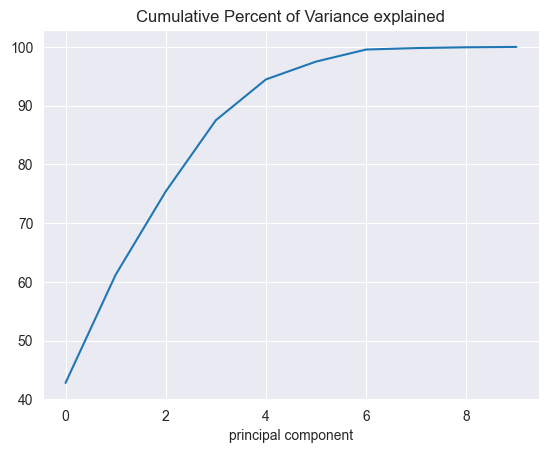

In [14]:
#percent of variance explained by each component

plt.plot(np.arange(pca.n_components_) ,np.cumsum(pca.explained_variance_ratio_)*100)
plt.xlabel('principal component')
plt.title('Cumulative Percent of Variance explained')
plt.show()

D:\laragon\bin\python\python-3.10\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\laragon\bin\python\python-3.10\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\laragon\bin\python\python-3.10\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\laragon\bin\python\python-3.10\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 1

3


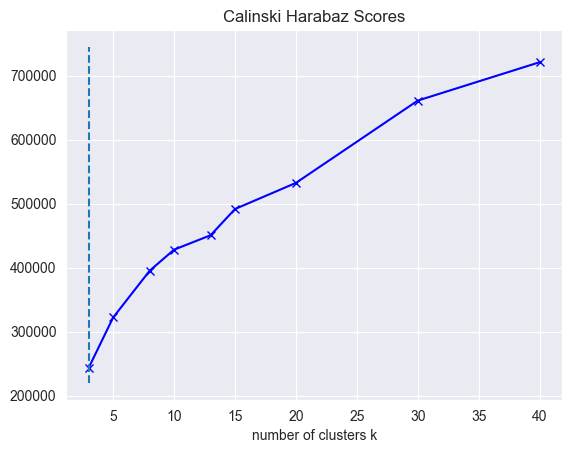

In [15]:
#scoring metric?
from sklearn.metrics import calinski_harabasz_score as ch_score
clusters = [3,5,8,10,13,15,20,30,40]
scores = []
inertias = []
for c in clusters:
    cl_n = KMeans(c).fit(results)
    score = ch_score(results, cl_n.labels_)
    scores.append(score)
    inertias.append(cl_n.inertia_)

kn = KneeLocator(clusters, scores, curve='convex', direction='decreasing')
print(kn.knee)

plt.xlabel('number of clusters k')
plt.title('Calinski Harabaz Scores')
plt.plot(clusters, scores, 'bx-')
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')


Text(0, 0.5, 'within cluster sum of squares')

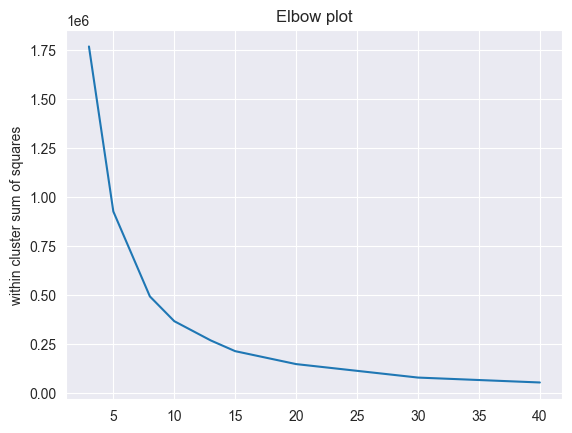

In [16]:
#elbow plot
plt.plot(clusters,inertias)
plt.title('Elbow plot')
plt.ylabel('within cluster sum of squares')

## Optimal clusters

In [17]:
NUM_CLUSTER = 13

In [18]:
#optimal number of clusters is around 5
cl = KMeans(NUM_CLUSTER)
cl.fit(results)

D:\laragon\bin\python\python-3.10\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=13)

In [19]:
#outlier removal


def remove_outliers(results, cl, threshold):
    '''
    returns subset of results, and associated labels as a tuple
    takes results and a fit KMeans cluster object'''
    
    new_labels = []
    new_results = []
    
    
    #code for deciding what clusters to keep
    for i, center in enumerate(cl.cluster_centers_):
        within_cluster_results = results[cl.labels_==i]
        centroid = cl.cluster_centers_[i]
        #calc std vectors
        stdev = np.std(within_cluster_results, axis=0)
       
        keep = np.linalg.norm((centroid - within_cluster_results), axis=1) < threshold*np.linalg.norm(stdev)
        new_results.append(within_cluster_results[keep])
        #add labels?
        new_labels.extend([i for j in range(len(within_cluster_results[keep]))])
    return np.vstack(new_results), np.array(new_labels)


In [20]:
thresholds = np.linspace(.3,3, 20)

test = [remove_outliers(results, cl,t) for t in thresholds]

scores= []
for (res, labels) in test:
    
    score = ch_score(res, labels)
    scores.append(score)

Text(0.5, 1.0, 'Calinski Harabaz Scores as std threshold changes')

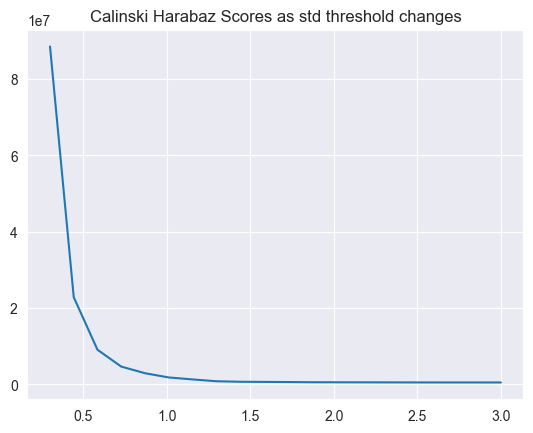

In [21]:
plt.plot(thresholds, scores)
plt.title('Calinski Harabaz Scores as std threshold changes')

In [22]:
newresults, labels = remove_outliers(results, cl,1)

In [23]:
pipe = Pipeline([('scale', StandardScaler()), ('PCA', PCA(n_components=5))])

results = pipe.fit_transform(data.values)

D:\laragon\bin\python\python-3.10\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 13 The average silhouette_score is : 0.963066655464299


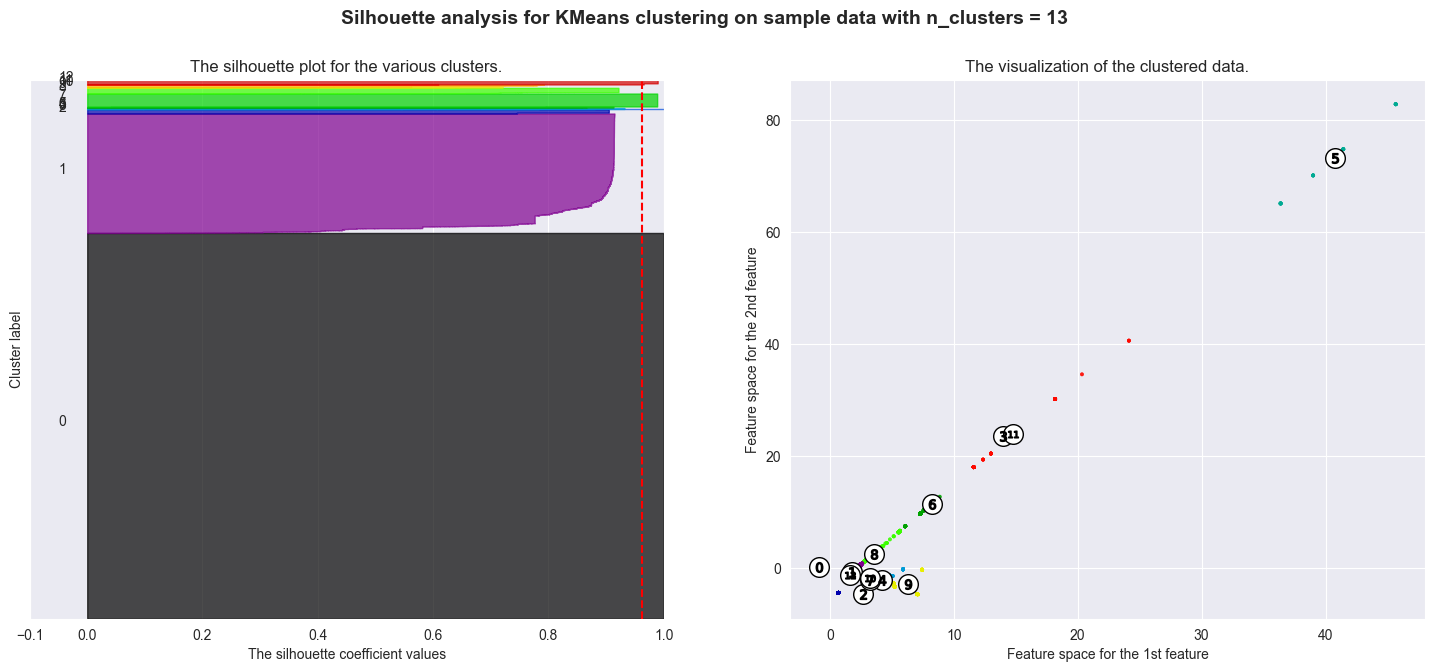

In [24]:
X = results

range_n_clusters = [NUM_CLUSTER]

for n_clusters in range_n_clusters:
#     X=data
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    #subset data so I don't kill computer
#     X=data[:100]
#     cluster_labels[:100]
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [25]:
#subset results for tsne
max_size = len(results)
subset_results = []
lbls = []
for c in np.unique(cl.labels_):
    mask = (cl.labels_==c)
    c_size = np.sum(mask)
    if c_size < max_size:
        lbls.extend(list(cl.labels_[cl.labels_==c]))
        subset_results.append(results[mask])
lbls=np.array(lbls)
subset_results=np.vstack(subset_results)

In [26]:
import time
from sklearn.manifold import TSNE

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=1000)
tsne_results = tsne.fit_transform(subset_results)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 395088 samples in 0.375s...
[t-SNE] Computed neighbors for 395088 samples in 434.259s...
[t-SNE] Computed conditional probabilities for sample 1000 / 395088
[t-SNE] Computed conditional probabilities for sample 2000 / 395088
[t-SNE] Computed conditional probabilities for sample 3000 / 395088
[t-SNE] Computed conditional probabilities for sample 4000 / 395088
[t-SNE] Computed conditional probabilities for sample 5000 / 395088
[t-SNE] Computed conditional probabilities for sample 6000 / 395088
[t-SNE] Computed conditional probabilities for sample 7000 / 395088
[t-SNE] Computed conditional probabilities for sample 8000 / 395088
[t-SNE] Computed conditional probabilities for sample 9000 / 395088
[t-SNE] Computed conditional probabilities for sample 10000 / 395088
[t-SNE] Computed conditional probabilities for sample 11000 / 395088
[t-SNE] Computed conditional probabilities for sample 12000 / 395088
[t-SNE] Computed conditional prob

C:\Users\WBPC.VN\AppData\Local\Temp\ipykernel_12312\3661226743.py:10: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for lh in leg.legendHandles:


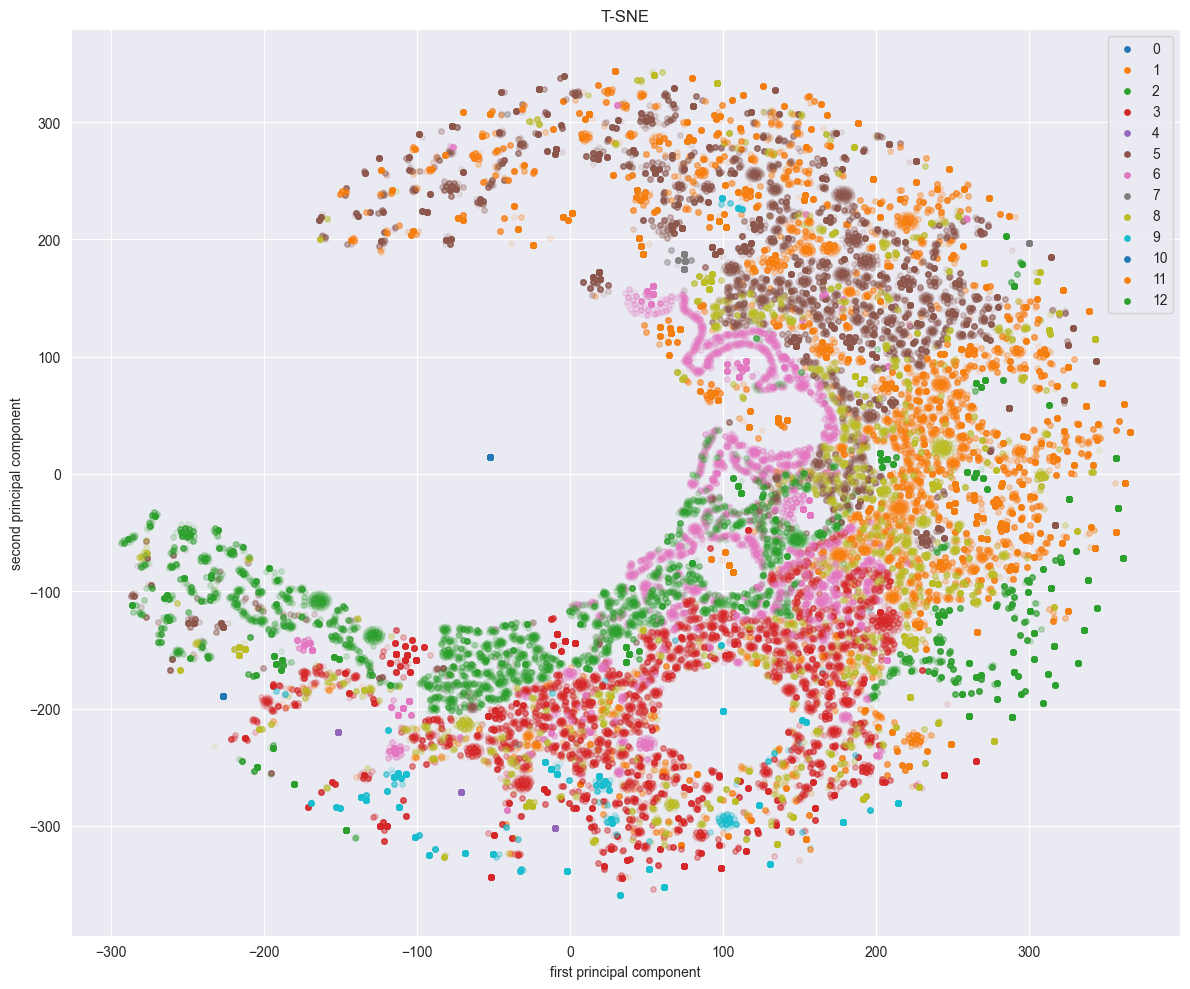

In [27]:
plt.figure(figsize=(12,10))
for c in np.unique(lbls):
    mask = lbls==c
    if np.sum(mask) <0:
        lbl = '_nolegend_'
    else:
        lbl = c
    plt.scatter(tsne_results[mask][:,0], tsne_results[mask][:,1], s=15,alpha=.1,label=lbl)
leg = plt.legend()
for lh in leg.legendHandles: 
    lh.set_alpha(1)
plt.title('T-SNE')
plt.xlabel('first principal component')
plt.ylabel('second principal component')
plt.tight_layout()

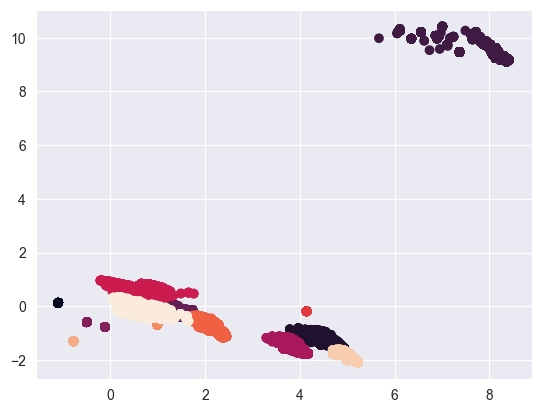

In [28]:

plt.scatter(newresults[:,0],newresults[:,1],c=labels)

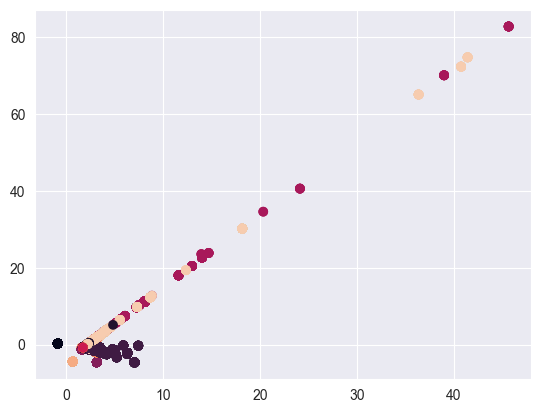

In [29]:
plt.scatter(results[:,0],results[:,1],c=cl.labels_)

In [30]:
newcl = KMeans(40).fit(newresults)

D:\laragon\bin\python\python-3.10\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [31]:
from mpl_toolkits.mplot3d import Axes3D

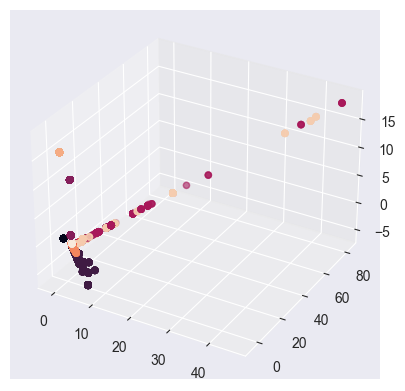

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(results[:,0],results[:,1],results[:,2],c=cl.labels_)

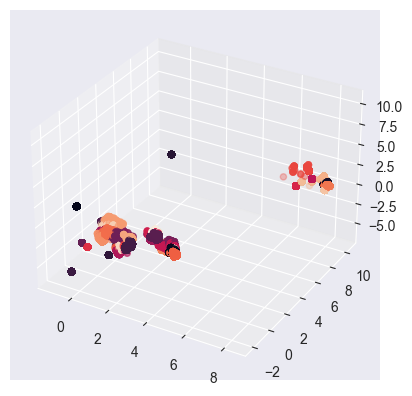

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(newresults[:,0],newresults[:,1],newresults[:,2],c=newcl.labels_)

## Label centroids with cluster

In [34]:
c = cl.cluster_centers_
#transform back to real numbers
centroids = log.inverse_transform(scale.inverse_transform(pca.inverse_transform(c)))
df_summary = pd.DataFrame(centroids, columns = data.columns)

D:\laragon\bin\python\python-3.10\lib\site-packages\sklearn\preprocessing\_function_transformer.py:312: RuntimeWarning: overflow encountered in expm1
  return func(X, **(kw_args if kw_args else {}))


In [35]:
cluster_sizes = pd.Series(cl.labels_).value_counts()
df_summary['cluster_size'] = cluster_sizes


In [36]:
df_summary.sort_values('cluster_size', ascending=False, axis=0, inplace=True)
df_summary

,tokens,balanceInUSD,borrowInUSD,borrowTokens,dailyNumberOfTransactions,dailyAllTransactions,dailyTransactionAmounts,depositInUSD,numberOfLiquidation,totalValueOfLiquidation,cluster_size
0,1.527455e+182,4.737159e+191,5.428991e-14,4.193867e-14,-1.420233e-10,1.487699e-14,4.439497e+03,13.508171,1.576701e-16,1.105236e-15,282853
11,1.299742e+03,2.186754e+10,2.640250e+00,1.771165e+00,6.707610e+114,2.499424e+00,1.255942e+05,183.709127,6.757290e-17,-2.207869e-15,20205
5,4.570112e+04,2.371234e+06,2.522697e+00,1.687731e+00,2.699595e+23,2.314815e-14,1.882256e+04,126.833728,1.072493e-15,6.019707e-15,15309
3,7.687910e+01,2.426648e+04,2.010727e-02,1.352021e-02,5.975982e+08,2.488505e+00,3.095710e+03,0.565304,1.435906e-05,8.331917e-06,13435
9,1.307215e+07,5.182340e+84,7.990936e-05,2.768744e-05,4.630909e+263,2.556545e+00,1.227592e+06,0.017432,-7.690788e-16,-5.999975e-15,12287
1,3.854080e+02,6.579479e+03,2.563501e+00,1.587049e+00,3.217355e+07,2.382261e+00,1.325101e+03,89.899839,-5.179776e-17,-4.391669e-15,11628
8,3.642740e+03,1.593111e+07,1.259932e-02,2.541430e-03,5.867260e+37,1.341681e+00,2.113578e+04,85.743995,5.397538e-05,8.148634e-07,9831
6,6.754632e+00,7.304647e+01,7.261569e-02,4.639277e-02,1.069296e+00,5.716058e-01,6.900403e-01,1.397942,2.725100e-05,3.724179e-06,8853
12,8.756111e+04,2.128533e+05,9.015086e-02,7.492851e-02,5.087339e+19,-2.448042e-14,4.927871e+03,1.292144,4.392645e-16,2.873136e-15,8120
4,3.606649e+42,2.864695e+150,-4.712897e-13,-3.546885e-13,inf,-1.923461e-14,6.124610e+06,6.688252,-2.797513e-16,-8.057791e-16,5836


In [37]:
df_summary.to_csv("cluster_summary.csv")

<Axes: >

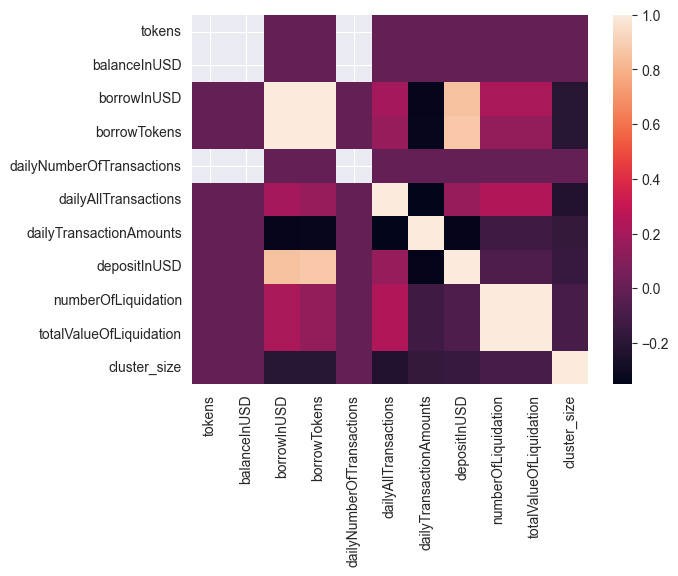

In [38]:
import seaborn as sns
sns.heatmap(df_summary.corr())

In [39]:
df_summary.values.shape

(13, 11)

D:\laragon\bin\python\python-3.10\lib\site-packages\numpy\lib\function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
D:\laragon\bin\python\python-3.10\lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
D:\laragon\bin\python\python-3.10\lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


<Axes: >

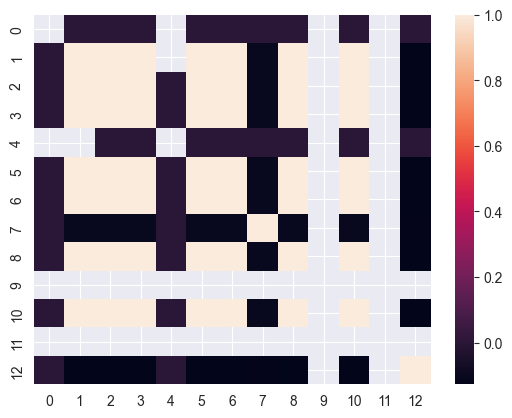

In [40]:
sns.heatmap(np.corrcoef(df_summary.values, rowvar=True))

In [41]:
p = PCA(n_components=3)

In [42]:
df_result = pd.DataFrame({"address": df["address"]})

In [43]:
lbls = []
for i, row in df_result.iterrows():
    lbls.append(list(df['address'].values).index(row['address']))

In [44]:
df_result['cluster'] = [cl.labels_[i] for i in lbls]

In [45]:
df_result.shape

(395088, 2)

In [46]:
df_result.head(100)

,address,cluster
0,0x8daaa78bf8fc2d19fbb3b88319325607460387a3,6
1,0xdacfe9e62dff6487458f64092aed45a2c9599740,6
2,0xb7fac33f47af1160ba17eb82e7202584f73a8fad,8
3,0xb02fa29bfd054db5514115533b6fac39dac75391,12
4,0x3a95ac31729140d6ac25c80b90eceec9b929eb9e,12
...,...,...
95,0xd7f1dd5d49206349cae8b585fcb0ce3d96f1696f,6
96,0xd7f1dd5d49206349cae8b585fcb0ce3d96f1696f,6
97,0xd7f1dd5d49206349cae8b585fcb0ce3d96f1696f,6
98,0xd7f1dd5d49206349cae8b585fcb0ce3d96f1696f,6


In [47]:
df_result.to_csv("cluster_result.csv")